# Course: Application of AI, Data Science and Machine Learning
# Lab 7: Generative Adversarial Learning

## Q1. Generate GAN model for function f(x) =X^2. Using the information in lecture 14, 15 or on the following blog
https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-a-1-dimensional-function-from-scratch-in-keras/

In [12]:
import numpy as np
from numpy import hstack, zeros, ones
from numpy.random import rand, randn
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
def calculate(x):
    return 1 + np.sin(2 * np.pi * x)

In [14]:
def define_discriminator(n_inputs=2):
    model = Sequential()
    model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(20, activation='relu', kernel_initializer='he_uniform'))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(15, activation='relu', kernel_initializer='he_uniform'))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
    return model

In [15]:
def define_generator(latent_dim, n_outputs=2):
    model = Sequential()
    model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
    model.add(Dense(n_outputs, activation='linear'))
    return model

In [16]:
def define_gan(generator, discriminator):
    discriminator.trainable = False
    model=Sequential()
    model.add(generator)
    model.add(discriminator)
    model.compile(loss="binary_crossentropy", optimizer="adam")
    return model

In [17]:
def generate_real_samples(n):
    X1 = rand(n) - 0.5
    X2 = calculate(X1)
    X1 = X1.reshape(n, 1)
    X2 = X2.reshape(n, 1)
    X=hstack((X1, X2))
    y = ones((n, 1))
    return X, y

In [18]:
def generate_latent_points(latent_dim, n):
    x_input = randn(latent_dim * n)
    x_input = x_input.reshape(n, latent_dim)
    return x_input

In [19]:
def generate_fake_samples(generator, latent_dim, n):
    x_input = generate_latent_points(latent_dim, n)
    X = generator.predict(x_input)
    y=zeros((n, 1))
    return X, y

In [20]:
def summarize_performance(epoch, generator, discriminator, latent_dim, n=100):
    x_real, y_real = generate_real_samples(n)
    _, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
    x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
    _, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
    print(epoch, acc_real, acc_fake)
    plt.scatter(x_real[:, 0], x_real[:, 1], color="red")
    plt.scatter(x_fake[:, 0], x_fake[:, 1], color='blue')
    plt.show()
    filename = 'generated_plot_e%03d.png' % (epoch+1)
    plt.close()

In [21]:
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128, n_eval=1000):
    half_batch = int(n_batch / 2)

    for i in range(n_epochs):
        x_real, y_real = generate_real_samples(half_batch)
        x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
        d_model.train_on_batch(x_real, y_real)
        d_model.train_on_batch(x_fake, y_fake)
        x_gan = generate_latent_points(latent_dim, n_batch)
        y_gan = ones((n_batch, 1))
        gan_model.train_on_batch(x_gan, y_gan)
        if (i+1) % n_eval == 0:
            summarize_performance(i, g_model, d_model, latent_dim)

999 0.8299999833106995 0.8899999856948853


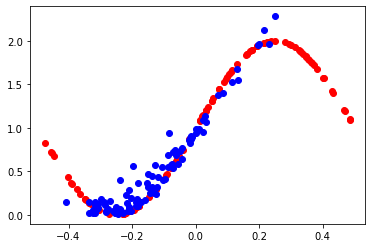

1999 0.699999988079071 0.8100000023841858


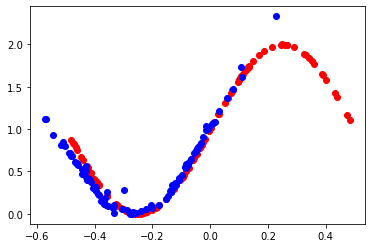

2999 0.6200000047683716 0.8299999833106995


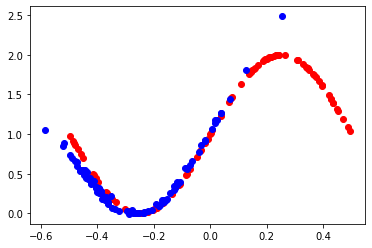

3999 0.7300000190734863 0.800000011920929


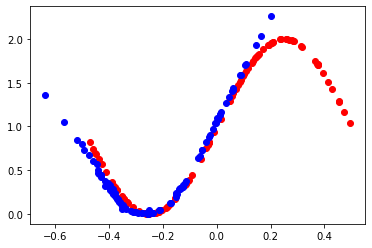

4999 0.7300000190734863 0.8899999856948853


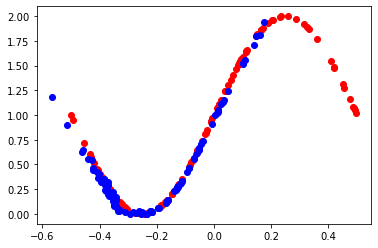

5999 0.6200000047683716 0.5400000214576721


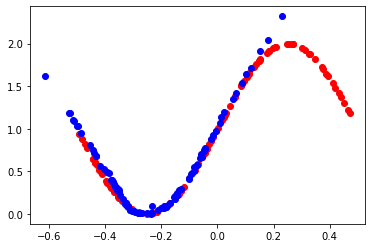

6999 0.6700000166893005 0.7200000286102295


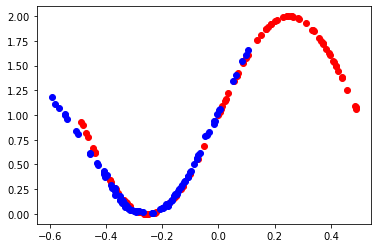

7999 0.5899999737739563 0.8500000238418579


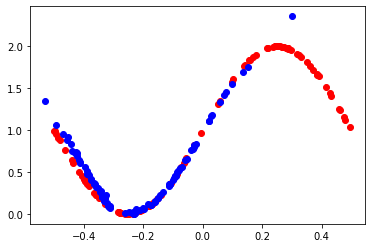

8999 0.800000011920929 0.6499999761581421


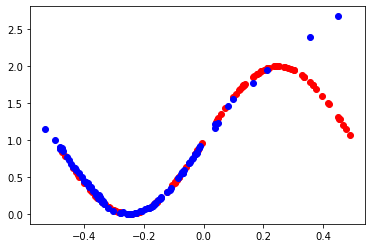

9999 0.7099999785423279 0.8399999737739563


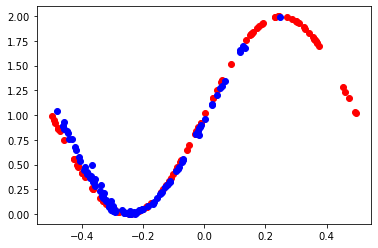

In [22]:
latent_dim = 5
discriminator=define_discriminator()
generator=define_generator(latent_dim)
gan_model=define_gan(generator, discriminator)

train(generator, discriminator, gan_model, latent_dim)

# Credit:
https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-a-1-dimensional-function-from-scratch-in-keras/

# More
https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-an-mnist-handwritten-digits-from-scratch-in-keras/